In [1]:
%matplotlib notebook

from sdss import SDSS
import mikkel_tools.utility as mt_util

import numpy as np
from math import inf
from scipy.optimize import curve_fit
import scipy as sp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import time
import pyshtools
import pickle

comment = "Synthetic core with tapered ensemble as prior"
nb_name = "nb_case_core_synthetic_Ce1"

In [ ]:
shc_g = 30
shc_grid = 30

core = SDSS(comment, N_SH = shc_g, sim_type = "core_ens", sat_height = 350)

core.grid_glq(nmax = shc_grid, r_at = core.r_cmb)

grid_in = np.array([core.grid_phi, 90-core.grid_theta]).T
core.make_grid(core.r_cmb, grid_in, calc_sph_d = False)
core.generate_map()

core.condtab(normsize=10000, quantiles = 1000, 
             rangn_lim = 3.5, rangn_N = 501, rangv_lim = 2.0, rangv_N = 101, model_hist = "ensemble") #model_hist = "ensemble"

# Covariance model

In [ ]:
core.cov_model_taper(r_at = core.r_cmb, tap_to = 500, tap_exp_p1 = 5, tap_exp_p2 = 2,
                     tap_scale_start = 0, tap_scale_end = 24, plot_taper = True,
                     save_fig = False, save_string = "case_core_synthetic", save_dpi = 300)

# Synthetic sat

In [ ]:
C_e_const = 1.0

s_sat = SDSS(comment, N_SH = shc_g, sim_type = "core", sat_height = 350, N_SH_secondary = None)

s_sat.load_swarm("A")

grid_in = np.array([s_sat.grid_phi, 90-s_sat.grid_theta]).T
s_sat.make_grid(s_sat.grid_radial, grid_in, calc_sph_d = False)

s_sat.generate_map(grid_type = "swarm")

s_sat.data += np.random.normal(scale = 2.0, size = s_sat.data.shape)

# Source truth

In [ ]:
s_source = SDSS(comment, N_SH = shc_g, sim_type = "core", sat_height = 350, N_SH_secondary = None)

s_source.grid_glq(nmax = shc_grid, r_at = core.r_cmb)

grid_in = np.array([s_source.grid_phi, 90-s_source.grid_theta]).T
s_source.make_grid(s_source.r_cmb, grid_in, calc_sph_d = False)

s_source.generate_map()

# System equations

In [ ]:
core.integrating_kernel(s_sat, C_e_const = C_e_const, C_mm_supply = core.C_ens_tap)

# SDSSIM

In [7]:
N_sim = 100
core.target_var = np.max(core.C_ens_tap)

core.run_sim(N_sim, core.grid_N, core.C_mm_all, core.C_dd, core.C_dm_all, core.G,
        s_sat.data, core.data, scale_m_i = True, unit_d = False, collect_all = True,
        sense_running_error = True, save_string = nb_name, sim_stochastic = False, solve_cho = True)

 |OOOOOOOOOO| 100.0%   realization nr. 0. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 16.460 minutes 
Total elapsed time: 16.460 minutes 
Variance: 312392321358.054
Mean: -9677.174
Max: 1942538.034
Min: -1617129.457
Run nr.: 1

 |OOOOOOOOOO| 100.0%   realization nr. 1. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 16.611 minutes 
Total elapsed time: 33.071 minutes 
Variance: 402520954809.772
Mean: -11369.826
Max: 1681057.343
Min: -4798399.317
Run nr.: 2

 |OOOOOOOOOO| 100.0%   realization nr. 2. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 17.894 minutes 
Total elapsed time: 50.964 minutes 
Variance: 321320265733.254
Mean: -9861.225
Max: 1944178.415
Min: -1596803.468
Run nr.: 3

 |OOOOOOOOOO| 100.0%   realization nr. 3. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 18.687 minutes 
Total elapsed time: 1.161 hours 
Variance: 315937852023.484
Mean: -5586.004
Max: 2086687.271
Min: -1621376.123
Run nr.: 4

 |OOOOOOOOOO| 100.0%   realiza

 |OOOOOOOOOO| 100.0%   realization nr. 34. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 11.892 minutes 
Total elapsed time: 9.590 hours 
Variance: 315378444169.908
Mean: -9691.205
Max: 1980726.385
Min: -1735171.791
Run nr.: 35

 |OOOOOOOOOO| 100.0%   realization nr. 35. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 11.830 minutes 
Total elapsed time: 9.787 hours 
Variance: 341621085603.296
Mean: -9656.783
Max: 2260957.754
Min: -4698525.893
Run nr.: 36

 |OOOOOOOOOO| 100.0%   realization nr. 36. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 11.969 minutes 
Total elapsed time: 9.986 hours 
Variance: 318565756708.103
Mean: -9757.978
Max: 2110856.410
Min: -1799649.380
Run nr.: 37

 |OOOOOOOOOO| 100.0%   realization nr. 37. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 12.619 minutes 
Total elapsed time: 10.197 hours 
Variance: 330611356060.089
Mean: -7824.354
Max: 3680620.798
Min: -2209744.785
Run nr.: 38

 |OOOOOOOOOO| 100.0%   realizat

 |OOOOOOOOOO| 100.0%   realization nr. 68. Counter: 1891/1891, Running error magnitude: 5.4
Run time: 13.359 minutes 
Total elapsed time: 16.827 hours 
Variance: 315751720071.838
Mean: -15220.044
Max: 2006249.776
Min: -1768043.698
Run nr.: 69

 |OOOOOOOOOO| 100.0%   realization nr. 69. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 12.941 minutes 
Total elapsed time: 17.042 hours 
Variance: 321644370918.028
Mean: -5586.159
Max: 1833953.326
Min: -1874255.965
Run nr.: 70

 |OOOOOOOOOO| 100.0%   realization nr. 70. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 13.078 minutes 
Total elapsed time: 17.260 hours 
Variance: 331705746873.772
Mean: -13161.209
Max: 2120110.643
Min: -1792781.288
Run nr.: 71

 |OOOOOOOOOO| 100.0%   realization nr. 71. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 13.373 minutes 
Total elapsed time: 17.483 hours 
Variance: 315634241593.704
Mean: -10550.085
Max: 1866714.602
Min: -1565515.090
Run nr.: 72

 |OOOOOOOOOO| 100.0%   re

 |OOOOOOOOOO| 100.0%   realization nr. 102. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.119 minutes 
Total elapsed time: 23.727 hours 
Variance: 322735839925.186
Mean: -15081.804
Max: 1922121.626
Min: -1606460.369
Run nr.: 103

 |OOOOOOOOOO| 100.0%   realization nr. 103. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.993 minutes 
Total elapsed time: 23.877 hours 
Variance: 316843196282.868
Mean: -8359.215
Max: 2372361.933
Min: -1565839.679
Run nr.: 104

 |OOOOOOOOOO| 100.0%   realization nr. 104. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.460 minutes 
Total elapsed time: 24.035 hours 
Variance: 348981016717.419
Mean: -8804.914
Max: 3304752.434
Min: -1589025.409
Run nr.: 105

 |OOOOOOOOOO| 100.0%   realization nr. 105. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.197 minutes 
Total elapsed time: 24.188 hours 
Variance: 317582948531.095
Mean: -10257.210
Max: 2123258.321
Min: -1439436.937
Run nr.: 106

 |OOOOOOOOOO| 100.0%  

 |OOOOOOOOOO| 100.0%   realization nr. 136. Counter: 1891/1891, Running error magnitude: 5.4
Run time: 9.296 minutes 
Total elapsed time: 28.869 hours 
Variance: 319442577190.658
Mean: -9426.930
Max: 2190761.225
Min: -1776529.790
Run nr.: 137

 |OOOOOOOOOO| 100.0%   realization nr. 137. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.015 minutes 
Total elapsed time: 29.019 hours 
Variance: 313043545591.530
Mean: -9894.294
Max: 2129031.733
Min: -1682435.344
Run nr.: 138

 |OOOOOOOOOO| 100.0%   realization nr. 138. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.795 minutes 
Total elapsed time: 29.166 hours 
Variance: 327498426329.821
Mean: -14044.644
Max: 2224934.809
Min: -4260610.912
Run nr.: 139

 |OOOOOOOOOO| 100.0%   realization nr. 139. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.034 minutes 
Total elapsed time: 29.316 hours 
Variance: 299831413473.082
Mean: -8565.053
Max: 1894236.936
Min: -1500854.882
Run nr.: 140

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 170. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 13.451 minutes 
Total elapsed time: 35.080 hours 
Variance: 318099150868.126
Mean: -11370.921
Max: 2651777.437
Min: -1714100.518
Run nr.: 171

 |OOOOOOOOOO| 100.0%   realization nr. 171. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 12.911 minutes 
Total elapsed time: 35.296 hours 
Variance: 317914990958.892
Mean: -8345.768
Max: 2146114.999
Min: -1525745.394
Run nr.: 172

 |OOOOOOOOOO| 100.0%   realization nr. 172. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 12.892 minutes 
Total elapsed time: 35.510 hours 
Variance: 307838898142.744
Mean: -12928.344
Max: 1886580.292
Min: -1878260.264
Run nr.: 173

 |OOOOOOOOOO| 100.0%   realization nr. 173. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 13.037 minutes 
Total elapsed time: 35.728 hours 
Variance: 338860321108.525
Mean: -12485.492
Max: 4861963.250
Min: -1894409.828
Run nr.: 174

 |OOOOOOOOOO| 100

 |OOOOOOOOOO| 100.0%   realization nr. 236. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 12.845 minutes 
Total elapsed time: 48.974 hours 
Variance: 333112986785.857
Mean: -12915.351
Max: 2143371.495
Min: -1694870.507
Run nr.: 237

 |OOOOOOOOOO| 100.0%   realization nr. 237. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 12.821 minutes 
Total elapsed time: 49.188 hours 
Variance: 340620782245.902
Mean: -8736.286
Max: 2626335.943
Min: -4515682.139
Run nr.: 238

 |OOOOOOOOOO| 100.0%   realization nr. 238. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 12.808 minutes 
Total elapsed time: 49.401 hours 
Variance: 311205953117.218
Mean: -11439.455
Max: 2231444.427
Min: -1516182.617
Run nr.: 239

 |OOOOOOOOOO| 100.0%   realization nr. 239. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 12.858 minutes 
Total elapsed time: 49.615 hours 
Variance: 320322638783.056
Mean: -17135.719
Max: 1954061.492
Min: -1525778.983
Run nr.: 240

 |OOOOOOOOOO| 100

 |OOOOOOOOOO| 100.0%   realization nr. 270. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.654 minutes 
Total elapsed time: 55.474 hours 
Variance: 322003433458.867
Mean: -15921.180
Max: 1972729.297
Min: -1560312.632
Run nr.: 271

 |OOOOOOOOOO| 100.0%   realization nr. 271. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.084 minutes 
Total elapsed time: 55.625 hours 
Variance: 317572604591.857
Mean: -6355.802
Max: 1783170.042
Min: -1566028.484
Run nr.: 272

 |OOOOOOOOOO| 100.0%   realization nr. 272. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.830 minutes 
Total elapsed time: 55.789 hours 
Variance: 319855833289.942
Mean: -9123.542
Max: 2260325.139
Min: -1710010.166
Run nr.: 273

 |OOOOOOOOOO| 100.0%   realization nr. 273. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.901 minutes 
Total elapsed time: 55.954 hours 
Variance: 324070757150.832
Mean: -2763.075
Max: 2268807.919
Min: -1425453.031
Run nr.: 274

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 304. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.247 minutes 
Total elapsed time: 60.848 hours 
Variance: 319045971675.207
Mean: -5684.086
Max: 1903117.051
Min: -1574577.633
Run nr.: 305

 |OOOOOOOOOO| 100.0%   realization nr. 305. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.524 minutes 
Total elapsed time: 61.007 hours 
Variance: 318493428207.646
Mean: -12272.457
Max: 2268364.464
Min: -1823220.910
Run nr.: 306

 |OOOOOOOOOO| 100.0%   realization nr. 306. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.952 minutes 
Total elapsed time: 61.173 hours 
Variance: 317576118390.272
Mean: -10831.769
Max: 2018760.689
Min: -1644183.425
Run nr.: 307

 |OOOOOOOOOO| 100.0%   realization nr. 307. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.200 minutes 
Total elapsed time: 61.326 hours 
Variance: 318516617521.395
Mean: -11507.811
Max: 2390021.879
Min: -1963254.546
Run nr.: 308

 |OOOOOOOOOO| 100.0% 

 |OOOOOOOOOO| 100.0%   realization nr. 338. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.166 minutes 
Total elapsed time: 66.231 hours 
Variance: 318879574726.534
Mean: -7772.884
Max: 1894748.625
Min: -1872324.677
Run nr.: 339

 |OOOOOOOOOO| 100.0%   realization nr. 339. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.522 minutes 
Total elapsed time: 66.390 hours 
Variance: 317111416779.276
Mean: -12509.220
Max: 2282735.140
Min: -1484282.260
Run nr.: 340

 |OOOOOOOOOO| 100.0%   realization nr. 340. Counter: 1891/1891, Running error magnitude: 5.4
Run time: 9.329 minutes 
Total elapsed time: 66.545 hours 
Variance: 330342894563.624
Mean: -8383.160
Max: 3874149.694
Min: -1513190.165
Run nr.: 341

 |OOOOOOOOOO| 100.0%   realization nr. 341. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.843 minutes 
Total elapsed time: 66.710 hours 
Variance: 324293428439.599
Mean: -6628.972
Max: 2544616.600
Min: -1483609.886
Run nr.: 342

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 372. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.255 minutes 
Total elapsed time: 71.630 hours 
Variance: 319907957159.209
Mean: -14331.236
Max: 2274635.139
Min: -1515428.739
Run nr.: 373

 |OOOOOOOOOO| 100.0%   realization nr. 373. Counter: 1891/1891, Running error magnitude: 5.4
Run time: 9.318 minutes 
Total elapsed time: 71.785 hours 
Variance: 319136081903.393
Mean: -5848.317
Max: 2357383.108
Min: -1793753.205
Run nr.: 374

 |OOOOOOOOOO| 100.0%   realization nr. 374. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.443 minutes 
Total elapsed time: 71.942 hours 
Variance: 322585411663.034
Mean: -6794.362
Max: 1811475.292
Min: -1831607.367
Run nr.: 375

 |OOOOOOOOOO| 100.0%   realization nr. 375. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.108 minutes 
Total elapsed time: 72.094 hours 
Variance: 316856269816.427
Mean: -12672.824
Max: 1899679.185
Min: -1880473.625
Run nr.: 376

 |OOOOOOOOOO| 100.0%  

 |OOOOOOOOOO| 100.0%   realization nr. 406. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.007 minutes 
Total elapsed time: 76.972 hours 
Variance: 313555181008.402
Mean: -10922.418
Max: 1784554.506
Min: -1938968.321
Run nr.: 407

 |OOOOOOOOOO| 100.0%   realization nr. 407. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.211 minutes 
Total elapsed time: 77.126 hours 
Variance: 314690107749.676
Mean: -5469.570
Max: 1948744.574
Min: -1745440.444
Run nr.: 408

 |OOOOOOOOOO| 100.0%   realization nr. 408. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.674 minutes 
Total elapsed time: 77.287 hours 
Variance: 316966051886.490
Mean: -11574.170
Max: 2699903.551
Min: -1594191.821
Run nr.: 409

 |OOOOOOOOOO| 100.0%   realization nr. 409. Counter: 1891/1891, Running error magnitude: 5.4
Run time: 9.560 minutes 
Total elapsed time: 77.446 hours 
Variance: 313215213622.750
Mean: -8075.825
Max: 1785955.146
Min: -1668845.049
Run nr.: 410

 |OOOOOOOOOO| 100.0%  

 |OOOOOOOOOO| 100.0%   realization nr. 440. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.308 minutes 
Total elapsed time: 82.287 hours 
Variance: 315533945862.261
Mean: -10002.189
Max: 1891917.007
Min: -1776048.059
Run nr.: 441

 |OOOOOOOOOO| 100.0%   realization nr. 441. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.071 minutes 
Total elapsed time: 82.438 hours 
Variance: 317234353189.673
Mean: -12700.186
Max: 1930212.663
Min: -1878431.246
Run nr.: 442

 |OOOOOOOOOO| 100.0%   realization nr. 442. Counter: 1891/1891, Running error magnitude: 5.4
Run time: 9.492 minutes 
Total elapsed time: 82.596 hours 
Variance: 313454331340.106
Mean: -9597.274
Max: 2083150.829
Min: -1788103.202
Run nr.: 443

 |OOOOOOOOOO| 100.0%   realization nr. 443. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.509 minutes 
Total elapsed time: 82.755 hours 
Variance: 316403015512.334
Mean: -13192.446
Max: 1993095.576
Min: -1698245.246
Run nr.: 444

 |OOOOOOOOOO| 100.0% 

 |OOOOOOOOOO| 100.0%   realization nr. 474. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.122 minutes 
Total elapsed time: 87.467 hours 
Variance: 313536868528.877
Mean: -10518.344
Max: 2256928.299
Min: -1590691.725
Run nr.: 475

 |OOOOOOOOOO| 100.0%   realization nr. 475. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.152 minutes 
Total elapsed time: 87.620 hours 
Variance: 317261402059.499
Mean: -15842.976
Max: 2020868.665
Min: -1720966.952
Run nr.: 476

 |OOOOOOOOOO| 100.0%   realization nr. 476. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.868 minutes 
Total elapsed time: 87.768 hours 
Variance: 344834469180.594
Mean: -11690.033
Max: 2506657.383
Min: -3788792.192
Run nr.: 477

 |OOOOOOOOOO| 100.0%   realization nr. 477. Counter: 1891/1891, Running error magnitude: 5.4
Run time: 8.837 minutes 
Total elapsed time: 87.915 hours 
Variance: 305819582597.642
Mean: -10549.630
Max: 1884614.264
Min: -1650821.965
Run nr.: 478

 |OOOOOOOOOO| 100.0%

 |OOOOOOOOOO| 100.0%   realization nr. 508. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.968 minutes 
Total elapsed time: 92.599 hours 
Variance: 325797233636.485
Mean: -5750.055
Max: 1752745.489
Min: -2229638.991
Run nr.: 509

 |OOOOOOOOOO| 100.0%   realization nr. 509. Counter: 1891/1891, Running error magnitude: 5.4
Run time: 9.187 minutes 
Total elapsed time: 92.752 hours 
Variance: 307688156065.864
Mean: -14561.141
Max: 1788704.131
Min: -1683361.514
Run nr.: 510

 |OOOOOOOOOO| 100.0%   realization nr. 510. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.964 minutes 
Total elapsed time: 92.901 hours 
Variance: 321427612077.271
Mean: -6156.325
Max: 1862883.418
Min: -1501619.893
Run nr.: 511

 |OOOOOOOOOO| 100.0%   realization nr. 511. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.929 minutes 
Total elapsed time: 93.050 hours 
Variance: 331540925927.149
Mean: -7396.022
Max: 1927430.979
Min: -4493577.152
Run nr.: 512

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 542. Counter: 1891/1891, Running error magnitude: 5.4
Run time: 8.884 minutes 
Total elapsed time: 97.622 hours 
Variance: 314168716479.891
Mean: -6345.597
Max: 1948885.876
Min: -1488879.533
Run nr.: 543

 |OOOOOOOOOO| 100.0%   realization nr. 543. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.529 minutes 
Total elapsed time: 97.764 hours 
Variance: 324130657259.319
Mean: -10506.405
Max: 2032410.142
Min: -1544276.688
Run nr.: 544

 |OOOOOOOOOO| 100.0%   realization nr. 544. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.836 minutes 
Total elapsed time: 97.911 hours 
Variance: 318642026110.889
Mean: -10253.515
Max: 1745763.427
Min: -1692939.254
Run nr.: 545

 |OOOOOOOOOO| 100.0%   realization nr. 545. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.865 minutes 
Total elapsed time: 98.059 hours 
Variance: 318244225613.767
Mean: -9694.335
Max: 1886410.475
Min: -1777989.917
Run nr.: 546

 |OOOOOOOOOO| 100.0%  

 |OOOOOOOOOO| 100.0%   realization nr. 576. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 11.030 minutes 
Total elapsed time: 102.717 hours 
Variance: 332617541332.999
Mean: -3672.429
Max: 1963067.558
Min: -1727529.236
Run nr.: 577

 |OOOOOOOOOO| 100.0%   realization nr. 577. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 10.950 minutes 
Total elapsed time: 102.900 hours 
Variance: 354985782434.727
Mean: -14683.689
Max: 4671138.026
Min: -1844403.337
Run nr.: 578

 |OOOOOOOOOO| 100.0%   realization nr. 578. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 11.461 minutes 
Total elapsed time: 103.091 hours 
Variance: 312612376220.874
Mean: -10136.351
Max: 1964915.816
Min: -1876749.869
Run nr.: 579

 |OOOOOOOOOO| 100.0%   realization nr. 579. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 10.956 minutes 
Total elapsed time: 103.273 hours 
Variance: 313845273699.247
Mean: -12091.503
Max: 1937312.135
Min: -1641866.851
Run nr.: 580

 |OOOOOOOOOO|

 |OOOOOOOOOO| 100.0%   realization nr. 642. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.531 minutes 
Total elapsed time: 113.878 hours 
Variance: 317986371438.582
Mean: -14533.288
Max: 1993978.022
Min: -1492976.759
Run nr.: 643

 |OOOOOOOOOO| 100.0%   realization nr. 643. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.319 minutes 
Total elapsed time: 114.033 hours 
Variance: 315577809781.311
Mean: -10098.325
Max: 2131097.345
Min: -1555748.940
Run nr.: 644

 |OOOOOOOOOO| 100.0%   realization nr. 644. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.508 minutes 
Total elapsed time: 114.191 hours 
Variance: 335967178962.334
Mean: -7019.637
Max: 4428977.316
Min: -2117788.643
Run nr.: 645

 |OOOOOOOOOO| 100.0%   realization nr. 645. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.614 minutes 
Total elapsed time: 114.352 hours 
Variance: 316751078787.474
Mean: -13133.989
Max: 2078307.099
Min: -1688498.893
Run nr.: 646

 |OOOOOOOOOO| 100

 |OOOOOOOOOO| 100.0%   realization nr. 708. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.135 minutes 
Total elapsed time: 124.639 hours 
Variance: 312183710103.853
Mean: -10782.483
Max: 2026370.570
Min: -1513140.331
Run nr.: 709

 |OOOOOOOOOO| 100.0%   realization nr. 709. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.067 minutes 
Total elapsed time: 124.790 hours 
Variance: 309408652895.903
Mean: -7563.300
Max: 2021539.096
Min: -1542182.209
Run nr.: 710

 |OOOOOOOOOO| 100.0%   realization nr. 710. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.464 minutes 
Total elapsed time: 124.947 hours 
Variance: 314629828233.385
Mean: -10126.716
Max: 2148863.405
Min: -1708970.401
Run nr.: 711

 |OOOOOOOOOO| 100.0%   realization nr. 711. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 12.342 minutes 
Total elapsed time: 125.153 hours 
Variance: 329229166094.147
Mean: -7870.232
Max: 1965115.220
Min: -1523666.714
Run nr.: 712

 |OOOOOOOOOO| 100

 |OOOOOOOOOO| 100.0%   realization nr. 775. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.666 minutes 
Total elapsed time: 134.688 hours 
Variance: 312827062351.159
Mean: -13177.509
Max: 1930326.890
Min: -1619377.095
Run nr.: 776

 |OOOOOOOOOO| 100.0%   realization nr. 776. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.459 minutes 
Total elapsed time: 134.829 hours 
Variance: 311109319175.232
Mean: -14799.482
Max: 2020927.719
Min: -1719587.866
Run nr.: 777

 |OOOOOOOOOO| 100.0%   realization nr. 777. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.860 minutes 
Total elapsed time: 134.977 hours 
Variance: 356509152180.037
Mean: -9452.170
Max: 4711264.934
Min: -1596387.053
Run nr.: 778

 |OOOOOOOOOO| 100.0%   realization nr. 778. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.624 minutes 
Total elapsed time: 135.121 hours 
Variance: 310711671742.446
Mean: -11467.804
Max: 2149087.033
Min: -1601380.710
Run nr.: 779

 |OOOOOOOOOO| 100

 |OOOOOOOOOO| 100.0%   realization nr. 842. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 11.292 minutes 
Total elapsed time: 144.588 hours 
Variance: 316696418816.380
Mean: -10393.934
Max: 1926725.839
Min: -1645996.869
Run nr.: 843

 |OOOOOOOOOO| 100.0%   realization nr. 843. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.670 minutes 
Total elapsed time: 144.732 hours 
Variance: 321266649436.702
Mean: -7835.319
Max: 2179263.263
Min: -1738668.649
Run nr.: 844

 |OOOOOOOOOO| 100.0%   realization nr. 844. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.317 minutes 
Total elapsed time: 144.887 hours 
Variance: 317563369949.881
Mean: -8580.196
Max: 2302064.083
Min: -1691263.891
Run nr.: 845

 |OOOOOOOOOO| 100.0%   realization nr. 845. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.095 minutes 
Total elapsed time: 145.039 hours 
Variance: 320153660423.274
Mean: -8700.810
Max: 1994458.286
Min: -1558625.120
Run nr.: 846

 |OOOOOOOOOO| 100.

 |OOOOOOOOOO| 100.0%   realization nr. 909. Counter: 1891/1891, Running error magnitude: 5.4
Run time: 9.475 minutes 
Total elapsed time: 154.944 hours 
Variance: 320335493383.094
Mean: -10917.725
Max: 1752680.733
Min: -1603821.937
Run nr.: 910

 |OOOOOOOOOO| 100.0%   realization nr. 910. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.391 minutes 
Total elapsed time: 155.101 hours 
Variance: 325086539729.534
Mean: -10907.385
Max: 1967947.722
Min: -1981745.425
Run nr.: 911

 |OOOOOOOOOO| 100.0%   realization nr. 911. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.593 minutes 
Total elapsed time: 155.261 hours 
Variance: 320598091540.665
Mean: -7271.796
Max: 2098717.737
Min: -2024516.488
Run nr.: 912

 |OOOOOOOOOO| 100.0%   realization nr. 912. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.255 minutes 
Total elapsed time: 155.415 hours 
Variance: 334112388866.792
Mean: -7882.732
Max: 1987522.684
Min: -1809896.934
Run nr.: 913

 |OOOOOOOOOO| 100.

 |OOOOOOOOOO| 100.0%   realization nr. 943. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.165 minutes 
Total elapsed time: 160.156 hours 
Variance: 324217459160.723
Mean: -10833.510
Max: 2032890.312
Min: -1852795.257
Run nr.: 944

 |OOOOOOOOOO| 100.0%   realization nr. 944. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.454 minutes 
Total elapsed time: 160.314 hours 
Variance: 330593645793.571
Mean: -9128.806
Max: 2092570.195
Min: -4677376.233
Run nr.: 945

 |OOOOOOOOOO| 100.0%   realization nr. 945. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 9.335 minutes 
Total elapsed time: 160.470 hours 
Variance: 320415741386.134
Mean: -7971.519
Max: 2201332.987
Min: -1749204.129
Run nr.: 946

 |OOOOOOOOOO| 100.0%   realization nr. 946. Counter: 1891/1891, Running error magnitude: 5.4
Run time: 9.376 minutes 
Total elapsed time: 160.626 hours 
Variance: 332238100672.085
Mean: -10638.182
Max: 2122466.909
Min: -4842585.231
Run nr.: 947

 |OOOOOOOOOO| 100.

 |OOOOOOOOOO| 100.0%   realization nr. 977. Counter: 1891/1891, Running error magnitude: 5.4
Run time: 8.557 minutes 
Total elapsed time: 165.520 hours 
Variance: 308742970726.527
Mean: -12847.277
Max: 1986078.666
Min: -1570601.593
Run nr.: 978

 |OOOOOOOOOO| 100.0%   realization nr. 978. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.811 minutes 
Total elapsed time: 165.666 hours 
Variance: 315211360184.975
Mean: -9455.633
Max: 1912017.819
Min: -1659667.969
Run nr.: 979

 |OOOOOOOOOO| 100.0%   realization nr. 979. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.916 minutes 
Total elapsed time: 165.815 hours 
Variance: 322168234038.266
Mean: -10992.328
Max: 1796767.693
Min: -1469401.960
Run nr.: 980

 |OOOOOOOOOO| 100.0%   realization nr. 980. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.983 minutes 
Total elapsed time: 165.965 hours 
Variance: 312225777590.017
Mean: -11804.911
Max: 2056717.092
Min: -1677046.994
Run nr.: 981

 |OOOOOOOOOO| 100

<IPython.core.display.Javascript object>

In [8]:
core.realization_to_sh_coeff(core.r_cmb, set_nmax = shc_grid)

In [9]:
#core.covmod_lsq_equiv(s_sat.data, C_Br_model, core.G, core.r_cmb)

<IPython.core.display.Javascript object>


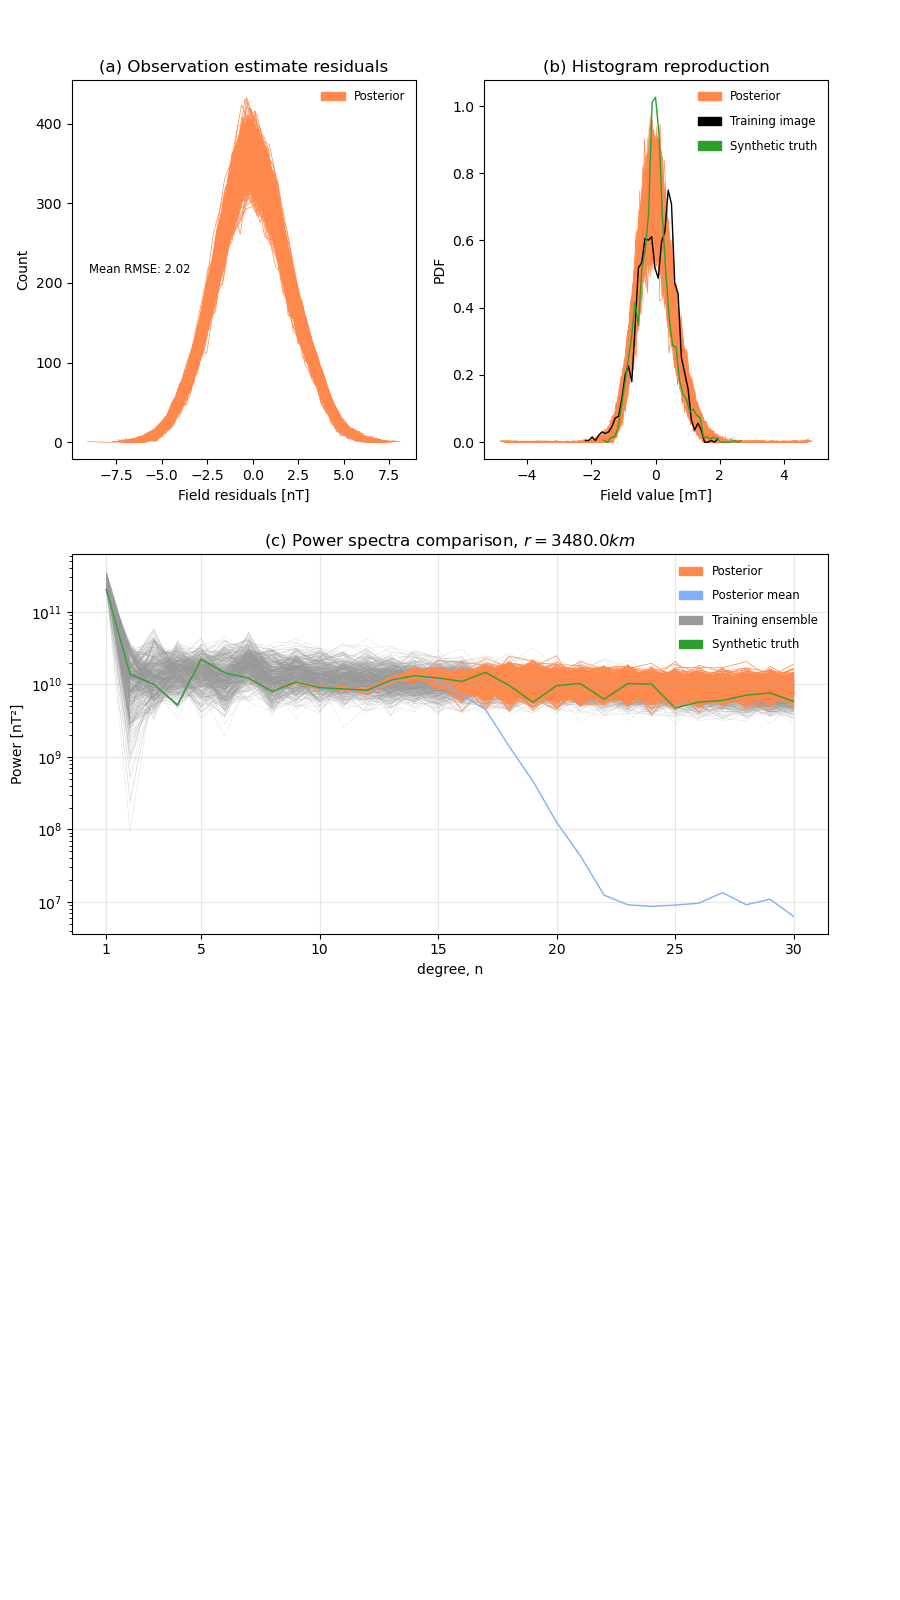

In [15]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)

#truth_obj = s_source

core.grid_glq(nmax = shc_grid, r_at = core.r_cmb)
mt_util.plot_sdssim_reproduce(core, core.m_DSS_res, m_equiv_lsq = None, truth_obj = s_source,
                              lags_use = 1000, spec_r_at = core.r_cmb, spec_show_differences = False,
                              spec_ti_ens = True, lwidth = .5, label_fontsize = "small",
                              res_use = True, sv_use = False, unit_field = "[mT]",
                              unit_transform_n_to_m = True, patch_legend = True, ens_prior = True,
                              model_dict = {}, figsize=(9,16), hist_ti_ens = False, hist_density = True,
                              hist_bins = 41, res_bins = 21, hist_pos_mean = False,
                              left=0.08, bottom=0.12, right=0.92, top=0.95, wspace = 0.2, hspace=0.25,
                              savefig = False, save_string = "case_core_synthetic", save_dpi = 300)

In [14]:
print(core)


______current attributes______

a:                  6371.2
r_sat:              6721.2
r_cmb:              3480.0
rad:                0.017453292519943295
mu0:                1.2566370614359173e-06
comment:            Synthetic core with tapered ensemble as prior
class_abs_path:     /home/mikotz/spherical_direct_sequential_simulation
N_SH:               30
N_SH_secondary:     None
sim_type:           core_ens
grid_zero:          (31,), Max/Min: 1.00 / -1.00
grid_w_shtools:     (31,), Max/Min: 0.10 / 0.01
grid_shape:         (2,), Max/Min: 61.00 / 31.00
grid_w:             (1891,), Max/Min: 0.10 / 0.01
grid_radial:        (1891,), Max/Min: 3480.00 / 3480.00
grid_theta:         (1891,), Max/Min: 175.63 / 4.37
grid_phi:           (1891,), Max/Min: 354.10 / 0.00
grid_N:             1891
grid_nmax:          30
r_grid:             3480.0
grid:               (1891, 2)
sph_d:              None
lon:                (1891,), Max/Min: 354.10 / 0.00
lat:                (1891,), Max/Min: 85.63 / -85

In [12]:
core.pickle_save_self(nb_name)


Saving job

Job saved and finished


In [24]:
list_coord = np.array([[0,2], [-30,30], [45,-45], [70,-170]])
list_coord[:,0] = 90 - list_coord[:,0]
list_coord[:,1][list_coord[:,1]<0.0] = 360 + list_coord[:,1][list_coord[:,1]<0.0]

m_coord_sph = np.hstack((90 - core.lat.reshape(-1,1), core.lon.reshape(-1,1)))

idx_min = []
for coord in list_coord:
    idx_min.append(np.sum(np.abs(m_coord_sph - coord),axis=1).argmin())
    
print(idx_min)

m_hists_coord = m_coord_sph[idx_min]

m_hists = core.m_DSS[idx_min,:]

[915, 1225, 480, 215]


In [25]:
left=0.08
bottom=0.12
right=0.92
top=0.95
wspace = 0.2
hspace=0.25

color_rgb_zesty_pos = (1.0,  0.5372549019607843,  0.30196078431372547)
color_rgb_zesty_neg = (0.5019607843137255,  0.6862745098039216,  1.0)

In [ ]:
m_hists_scale = m_hists*10**(-6)

tile_size_row = 2
tile_size_column = 2

label_fontsize = 10

fig = plt.figure(figsize=(9,9)) # Initiate figure with constrained layout
# Generate ratio lists
h_ratio = [1]*tile_size_row
w_ratio = [1]*tile_size_column
gs = fig.add_gridspec(tile_size_row, tile_size_column, height_ratios=h_ratio, width_ratios=w_ratio) # Add x-by-y grid

for i in np.arange(0,list_coord.shape[0]):

    ax = fig.add_subplot(gs[i])
    
    y,binEdges=np.histogram(m_hists_scale[i,:],bins=11,density=True)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])    
    ax.plot(bincenters, y, '-', color = color_rgb_zesty_neg, 
            label='{}'.format(str(np.round(m_hists_coord[i,:],decimals=1))).lstrip('[').rstrip(']'),
            linewidth = 1)

    #ax.set_title('test')
    #ax.annotate("test", (0.05, 0.5), xycoords='axes fraction', va='center', fontsize = label_fontsize)
    ax.set_xlabel("Field value [mT]")
    ax.set_ylabel("PDF")
    ax.legend(loc='best', fontsize = label_fontsize)
    

fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

In [13]:
#core.grid_glq(nmax = 256, r_at = core.r_cmb)
#core.grid_glq(nmax = 120, r_at = core.r_cmb)
core.grid_glq(nmax = 400, r_at = core.r_cmb)

set_nmax = shc_grid

core.ensemble_B(core.g_spec, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_eqa = core.B_ensemble[:,0,:].copy()

#core.g_spec_mean = np.mean(core.g_spec,axis=1)
core.ensemble_B(core.g_spec_mean, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_mean_eqa = core.B_ensemble[:,0].copy()

#core.ensemble_B(core.g_prior[:mt_util.shc_vec_len(set_nmax)], nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
core.ensemble_B(s_sat.g_prior[:mt_util.shc_vec_len(set_nmax)], nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
prior_eqa = core.B_ensemble[:,0].copy()

#core.ensemble_B(core.g_lsq_equiv, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
#lsq_eqa = core.B_ensemble[:,0].copy()

In [ ]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)
# ccrs.PlateCarree()
# ccrs.Mollweide()
# ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0)

mt_util.plot_ensemble_map_tiles(core.grid_phi, 90-core.grid_theta, zs_eqa, 
                        field_compare = prior_eqa, field_lsq = None, field_mean = zs_mean_eqa,
                        tile_size_row = 3, tile_size_column = 2, 
                        figsize=(9,12), limit_for_SF = 10**6, point_size = 0.1, cbar_mm_factor = 1, cbar_limit = [-1.6,1.6],
                        coast_width = 0.4, coast_color = "grey", unit_transform_n_to_m = True,
                        cbar_h = 0.1, cbar_text = "mT", cbar_text_color = "black",
                        left=0.03, bottom=0.12, right=0.97, top=0.95, wspace = 0.05, hspace=0.25, 
                        savefig = False, save_string = "case_core_synthetic", 
                        projection = ccrs.Mollweide(), use_gridlines = True, 
                        gridlines_width = 0.4, gridlines_alpha = 0.4, save_dpi = 100)
